In [ ]:
#5쪽
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X,y= make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=42)

voting_clf= VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(random_state=42))
    ]
)

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [ ]:
for name,clf in voting_clf.named_estimators_.items():
  print(name, "=", clf.score(X_test, y_test))

lr = 0.864
rf = 0.896
svc = 0.896


In [ ]:
voting_clf.predict(X_test[:1])

array([1])

In [ ]:
[clf.predict(X_test[:1]) for clf in voting_clf.estimators_]

[array([1]), array([1]), array([0])]

In [ ]:
voting_clf.score(X_test, y_test)

0.912

In [ ]:
#7쪽
voting_clf.voting="soft"
voting_clf.named_estimators["svc"].probability = True
voting_clf.fit(X_train, y_train)
voting_clf.score(X_test, y_test)

0.92

In [ ]:
#10쪽 배깅
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf= BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1, random_state=42)

In [ ]:
bag_clf= BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                           oob_score=True, n_jobs=-1, random_state=42)

bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.896

In [ ]:
#13쪽
from sklearn.metrics import accuracy_score
y_pred= bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.92

In [ ]:
bag_clf.oob_decision_function_[:3]

array([[0.32352941, 0.67647059],
       [0.3375    , 0.6625    ],
       [1.        , 0.        ]])

In [ ]:
#10쪽에서 추가: 페이스팅 (이거맞나?)
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

pasting_clf= BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                           bootstrap=False, max_samples=100, n_jobs=-1, random_state=42)
pasting_clf.fit(X_train, y_train) #페이스팅은 bootstrap=False의 차이만 있고 OOB는 못쓴다!!
pasting_clf.score(X_test, y_test) #이렇게 성능측정해보면 된다.

0.92

In [ ]:
#15쪽 랜덤 포레스트
from sklearn.ensemble import RandomForestClassifier

rnd_clf= RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)

rnd_clf.fit(X_train, y_train)
y_pred_rf=rnd_clf.predict(X_test)

In [ ]:
#16쪽
bag_clf= BaggingClassifier(
    DecisionTreeClassifier(max_features="sqrt", max_leaf_nodes=16),
    n_estimators=500, n_jobs= -1, random_state=42)


In [ ]:
from sklearn.datasets import load_iris
iris=load_iris(as_frame=True)
rnd_clf= RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(iris.data, iris.target)
for score,name in zip(rnd_clf.feature_importances_, iris.data.columns):
  print(round(score,2), name)

0.11 sepal length (cm)
0.02 sepal width (cm)
0.44 petal length (cm)
0.42 petal width (cm)


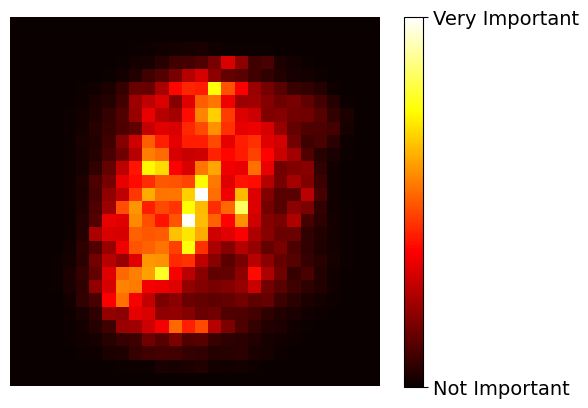

In [ ]:
#18쪽 시각화
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

X_mnist, y_mnist= fetch_openml('mnist_784', return_X_y=True,
                               as_frame=False, parser='auto')

rnd_clf= RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(X_mnist, y_mnist)
heatmap_image= rnd_clf.feature_importances_.reshape(28,28)
plt.imshow(heatmap_image, cmap="hot")
cbar= plt.colorbar(ticks=[rnd_clf.feature_importances_.min(),
                          rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not Important', 'Very Important'], fontsize=14)
plt.axis("off")
plt.show()

In [ ]:
#5쪽 코드 그대로 사용하여 24쪽에 적용
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X,y= make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=42)

In [ ]:
#24쪽
from sklearn.ensemble import AdaBoostClassifier

ada_clf= AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=30,
    learning_rate=0.5, random_state=42
)

ada_clf.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=30, random_state=42)

In [ ]:
ada_clf.score(X_test, y_test)

0.904

In [ ]:
#25쪽
import numpy as np
from sklearn.tree import DecisionTreeREgressor
np.random.seed(42)
X=np.random.rand(100,1)-0.5
y=3* X[:,0] **2 + 0.05 * np.random.randn(100)
tree_reg1= DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X,y)

In [ ]:
y2 = y - tree_reg1.predict(X)
tree_reg2= DecisionTreeRegressor(max_depth=2, random_state= 43)
tree_reg2.fit(X,y2)

In [ ]:
y3= y2- tree_reg2.predict(X)
tree_reg3= DecisionTreeRegressor(max_depth=2, random_state=44)
tree_reg3.fit(X,y3)

In [ ]:
X_new= np.array([[-0.4], [0.], [0.5]])

In [ ]:
sum(tree.p)